## Importing Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as  np

## Data Preperation

In [3]:
dark_horse = cv2.imread('DATA/horse.jpg') #original bgr channel for opencv calculation
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB) # rgb channel to show on matplotlib

rainbow = cv2.imread('DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

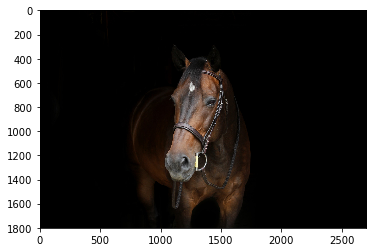

In [4]:
plt.imshow(show_horse)

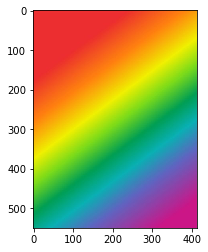

In [5]:
plt.imshow(show_rainbow)

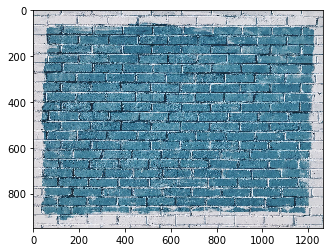

In [6]:
plt.imshow(show_bricks)

## Creating Histogram

### Blue Bricks

In [7]:
# opencv color channel order is bgr so if we want to see blue channel we need to enter [0] as index value
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [8]:
hist_values.shape

(256, 1)

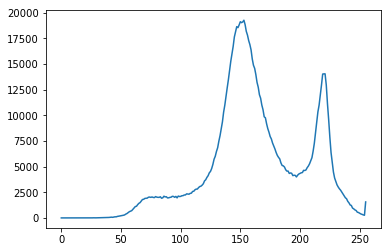

In [9]:
plt.plot(hist_values)

### Horse

In [10]:
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])

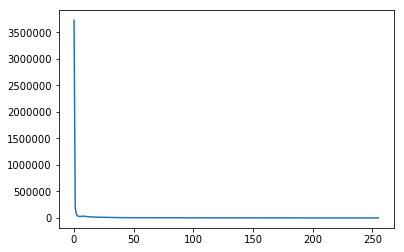

In [12]:
plt.plot(hist_values)

## Plotting 3 color histograms at once

In [13]:
img = blue_bricks

Text(0.5,1,'HISTOGRAM FOR BLUE BRICKS')

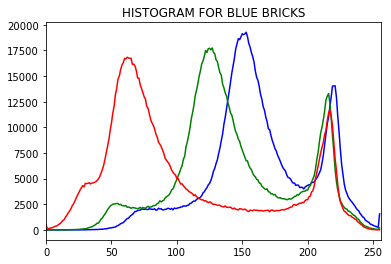

In [15]:
color = ('b','g','r')

for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])

plt.title('HISTOGRAM FOR BLUE BRICKS')

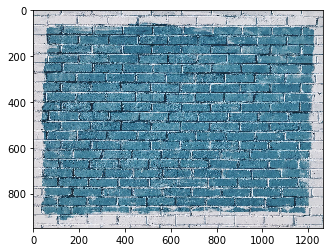

In [17]:
plt.imshow(show_bricks)

In [ ]:
img = dark_horse

Text(0.5,1,'HISTOGRAM FOR HORSE')

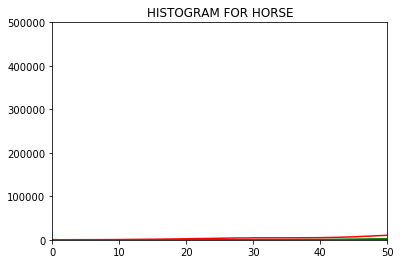

In [27]:
color = ('b','g','r')

for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,50])
    plt.ylim([0,500000])

plt.title('HISTOGRAM FOR HORSE')

## Histogram For Maxed Image

In [28]:
rainbow = cv2.imread('DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

In [29]:
img = rainbow

In [30]:
img.shape

(550, 413, 3)

In [60]:
mask = np.zeros(img.shape[:2],np.uint8)

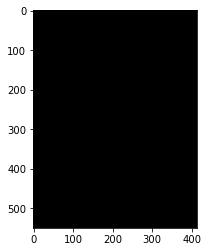

In [61]:
plt.imshow(mask,cmap='gray')
mask[300:400,100:400] = 255

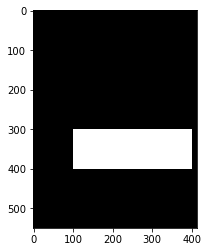

In [62]:
plt.imshow(mask,cmap='gray')

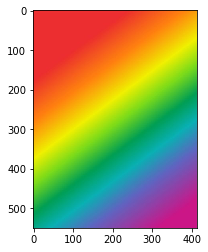

In [63]:
plt.imshow(show_rainbow)

In [64]:
masked_img = cv2.bitwise_and(img,img,mask=mask)

In [65]:
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask=mask)

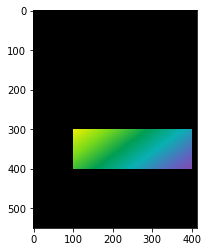

In [66]:
plt.imshow(show_masked_img)

In [67]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])

In [68]:
hist_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5,1,'RED HISTOGRAM FOR MASKED RAINBOW')

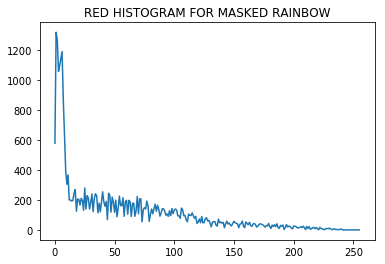

In [69]:
plt.plot(hist_mask_values_red)
plt.title('RED HISTOGRAM FOR MASKED RAINBOW')

Text(0.5,1,'RED HISTOGRAM FOR NO MASKED RAINBOW')

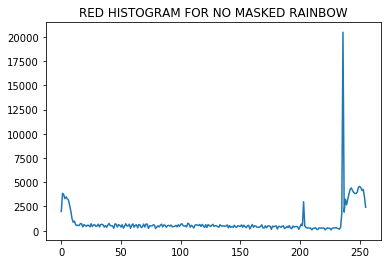

In [70]:
plt.plot(hist_values_red)
plt.title('RED HISTOGRAM FOR NO MASKED RAINBOW')

## Histogram Equalization

In [71]:
gorilla = cv2.imread('DATA/gorilla.jpg',0)

In [86]:
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

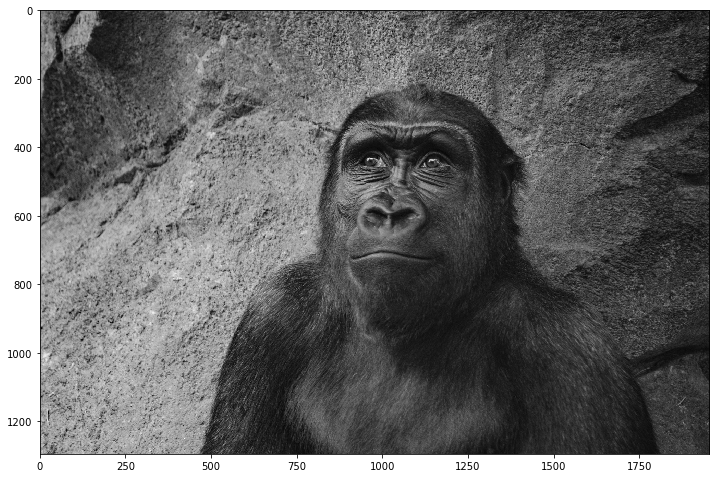

In [89]:
display_img(gorilla,cmap='gray')

In [75]:
gorilla.shape

(1295, 1955)

In [90]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

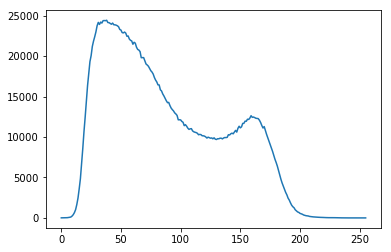

In [91]:
plt.plot(hist_values)

In [92]:
eq_gorilla = cv2.equalizeHist(gorilla)

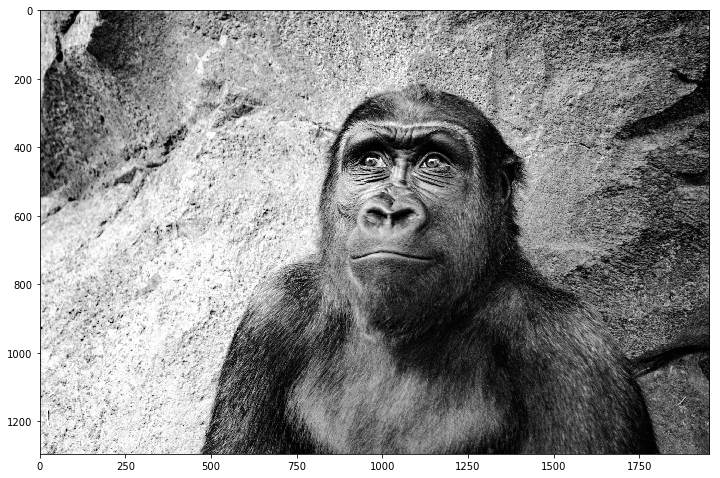

In [93]:
display_img(eq_gorilla,cmap='gray')

In [94]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

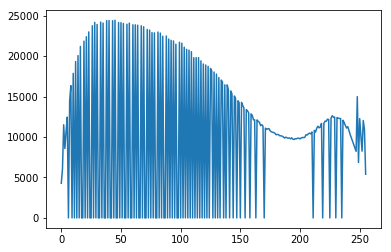

In [95]:
plt.plot(hist_values)

In [96]:
color_gorilla = cv2.imread('DATA/gorilla.jpg')

In [97]:
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)

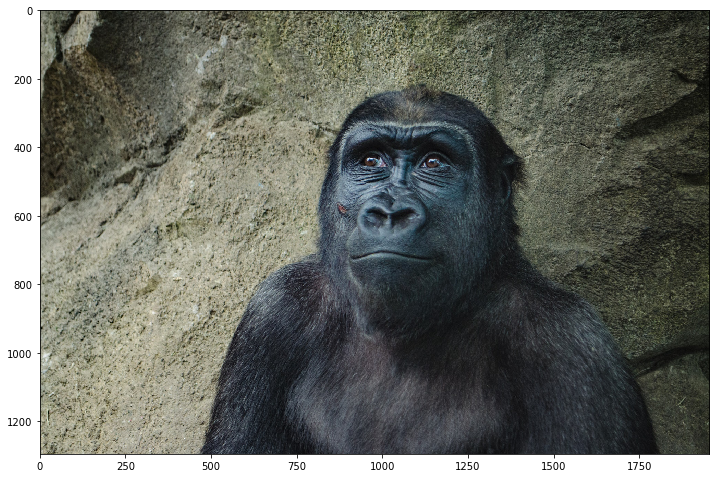

In [98]:
display_img(show_gorilla)

In [99]:
# we need to convert colored images color space from rgb to hsv because of the histogram algorithm works

In [100]:
hsv = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2HSV)

In [102]:
hsv[:,:,2].max()

255

In [103]:
hsv[:,:,2].min()

0

In [104]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

In [105]:
eq_color_gorilla = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

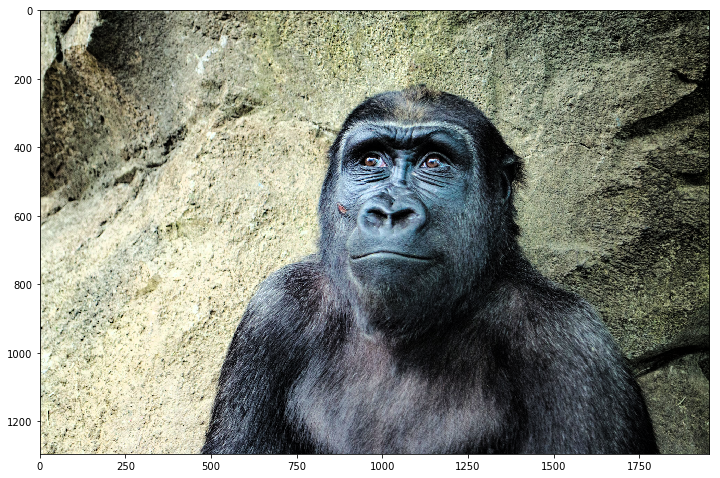

In [106]:
display_img(eq_color_gorilla)